<a href="https://colab.research.google.com/github/ImVikashKr/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

###Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

###Data Description
**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

##**Importing required libraries**

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.impute import KNNImputer

In [2]:
# Connecting colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading data from csv file to dataframe

In [3]:
# Importing data from google drive
data = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv")

In [4]:
# checking the data columns and values for some rows
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# List of columns 
list(data.columns)

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [6]:
# Number of rows and columns of data
data.shape

(3390, 17)

In [7]:
# Information anout the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#  data related statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [9]:
# checking if data contains null values
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
# Replacing string categorical value with numerical value 0 or 1

data['sex'] = data['sex'].replace({'F':1,'M':0})
data['is_smoking'] = data['is_smoking'].replace({'YES':1,'NO':0})

In [11]:
data.drop(['id'],axis=1,inplace=True)

**Imputing null values using KNN imputer**

In [12]:
# imputing missing values using KNN imputer for continuous variables
cts = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
imputer = KNNImputer(n_neighbors=3)
data[cts] = imputer.fit_transform(data[cts])

In [13]:
# imputing missing values using KNN imputer for categorical variables
from sklearn.impute import SimpleImputer
category = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
frequent= SimpleImputer(strategy="most_frequent")
data[category] = frequent.fit_transform(data[category])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 423.9 KB


In [15]:
# checking if data contains null values
data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##**Exploratory Data Analysis**

Text(0.5, 0, 'age')

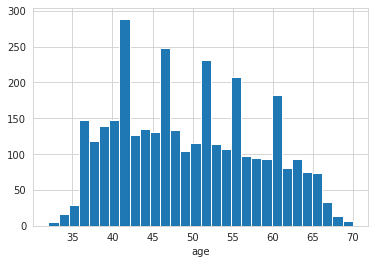

In [16]:
sns.set_style('whitegrid')
data['age'].hist(bins=30)
plt.xlabel('age')

###Jointplot Age versus different columns.

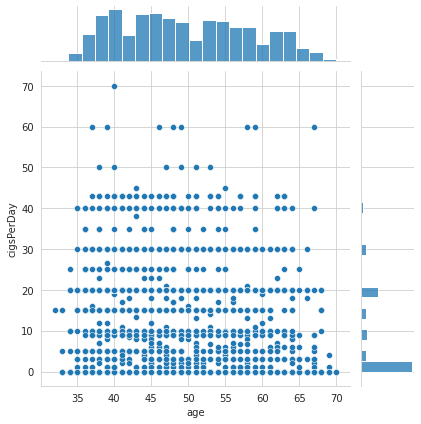

In [17]:
#plot for age and cigarette per day
sns.jointplot(x='age',y='cigsPerDay',data= data)

Most people smoke between 0 and 10 cigarettes a day.

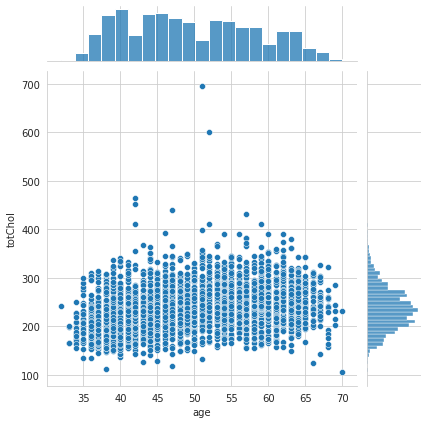

In [18]:
#plot for age and total cholesterol 
sns.jointplot(x='age',y='totChol',data= data)

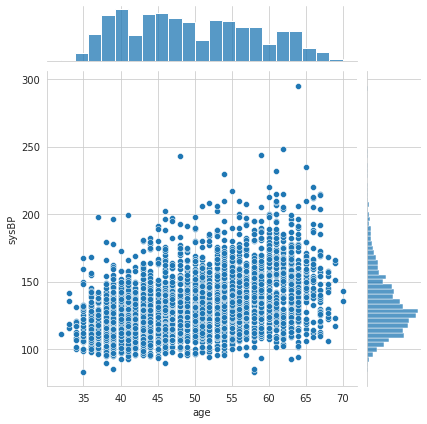

In [19]:
#plot for age and BP
sns.jointplot(x='age',y='sysBP',data= data)

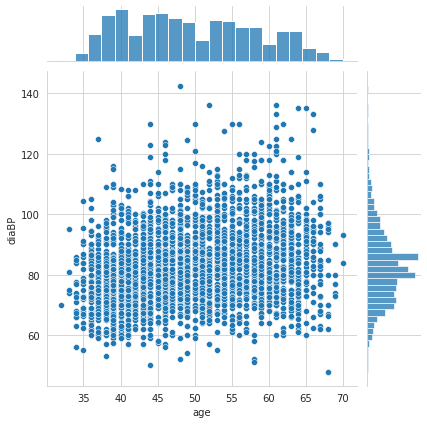

In [20]:
#plot for age and diabetic
sns.jointplot(x='age',y='diaBP',data= data)

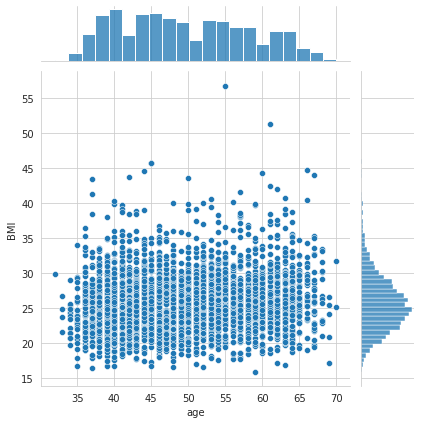

In [21]:
#plot for age and BMI
sns.jointplot(x='age',y='BMI',data= data)

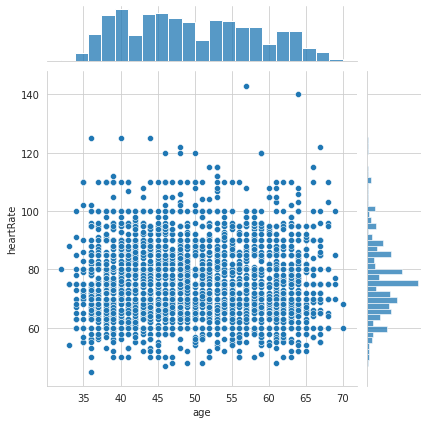

In [22]:
#plot for age and Heart Rate
sns.jointplot(x='age',y='heartRate',data= data)

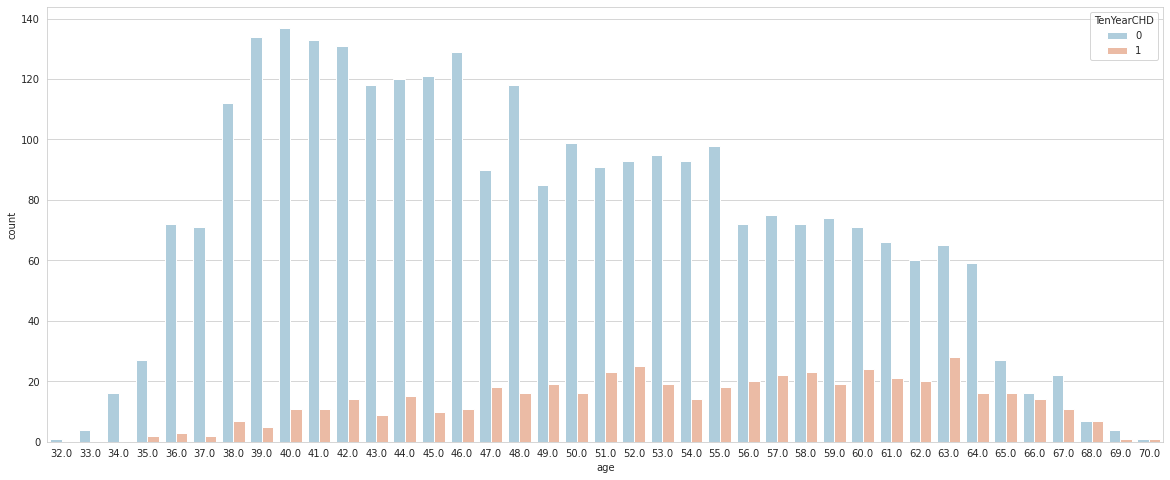

In [23]:
# plot for age v/s TenYearCHD
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.countplot(x='age',hue='TenYearCHD',data= data,palette='RdBu_r')

Risk of coronary heart disease rises with age up to age 63 and then declines beyond that.

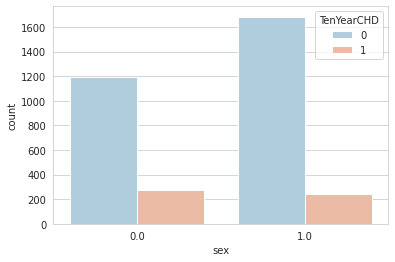

In [24]:
#plot for sex vs TenYearCHD
sns.set_style('whitegrid')
sns.countplot(x='sex',hue='TenYearCHD',data= data,palette='RdBu_r')

Compared to women, men are more likely to acquire coronary heart disease (CHD). 

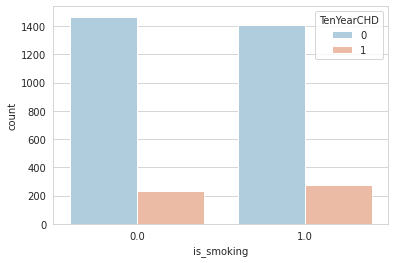

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='is_smoking',hue='TenYearCHD',data= data,palette='RdBu_r')

Compared to nonsmokers, smokers have a higher chance of developing coronary heart disease.

###Data Distribution for different target variable labels

In [26]:
# plotting  data distribution for different columns

def plot(col_name):
  print('\033[1m Ten Year CHD Values for different '+col_name+' values')
  ax = data.hist(column=col_name,by="TenYearCHD",bins=30, color = 'red')

 Ten Year CHD Values for different age values


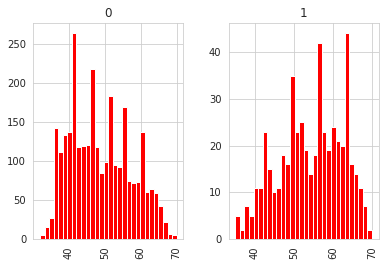

In [27]:
# data distribution for age column
plot('age')

 Ten Year CHD Values for different education values


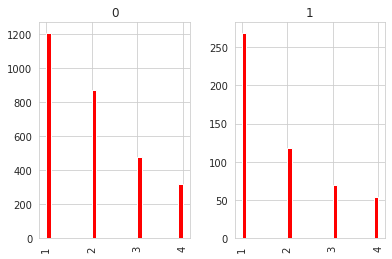

In [28]:
# data distribution for education column
plot('education')

 Ten Year CHD Values for different sex values


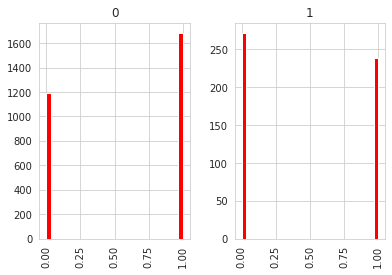

In [29]:
# data distribution for sex column
plot('sex')

 Ten Year CHD Values for different is_smoking values


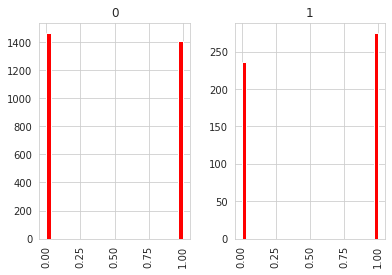

In [30]:
# data distribution for is_smoking column
plot('is_smoking')

 Ten Year CHD Values for different cigsPerDay values


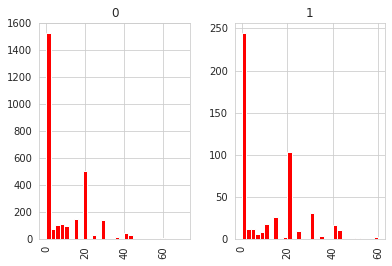

In [31]:
# data distribution for cigsPerDay column
plot('cigsPerDay')

 Ten Year CHD Values for different BPMeds values


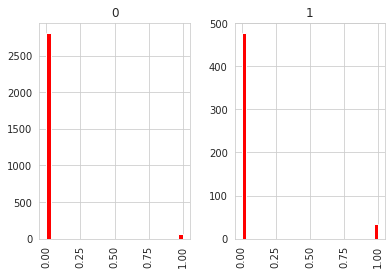

In [32]:
# data distribution for BPMeds column
plot('BPMeds')

 Ten Year CHD Values for different prevalentStroke values


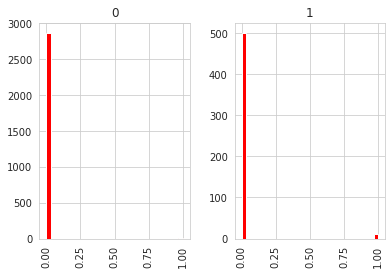

In [33]:
# data distribution for prevalentStroke column
plot('prevalentStroke')

 Ten Year CHD Values for different prevalentHyp values


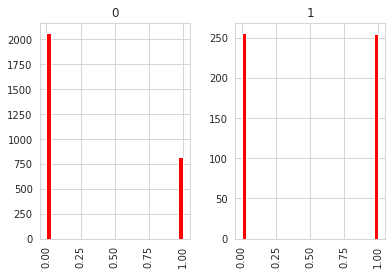

In [34]:
# data distribution for prevalentHyp column
plot('prevalentHyp')

 Ten Year CHD Values for different diabetes values


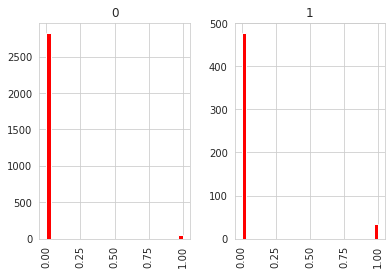

In [35]:
# data distribution for diabetes column
plot('diabetes')

 Ten Year CHD Values for different totChol values


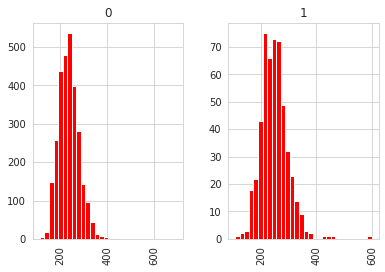

In [36]:
# data distribution for total cholesterol column
plot('totChol')

 Ten Year CHD Values for different sysBP values


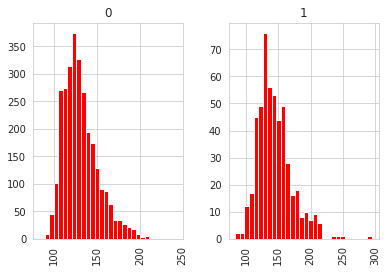

In [37]:
# data distribution for total systolic blood pressure column
plot('sysBP')

 Ten Year CHD Values for different diaBP values


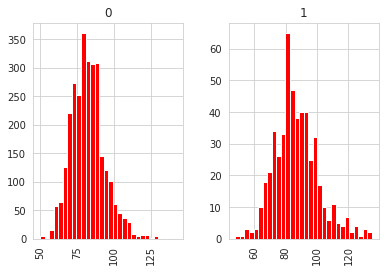

In [38]:
# data distribution for diastolic blood pressure column
plot('diaBP')

 Ten Year CHD Values for different BMI values


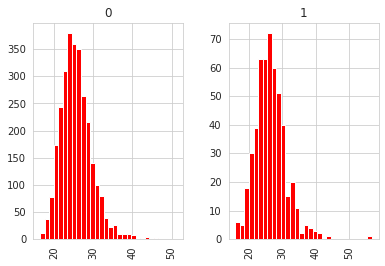

In [39]:
# data distribution for Body Mass Index column
plot('BMI')

 Ten Year CHD Values for different heartRate values


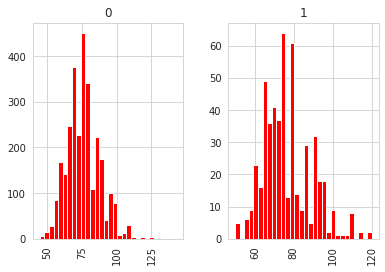

In [40]:
# data distribution for heartrate column
plot('heartRate')

 Ten Year CHD Values for different glucose values


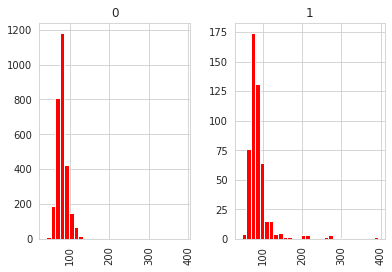

In [41]:
# data distribution for glucose column
plot('glucose')

##**Outliers Detection**

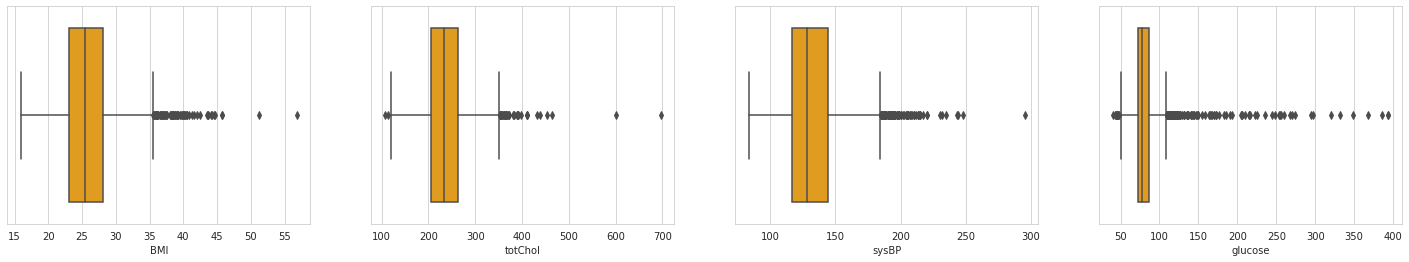

In [42]:
# plotting different column values to check outliers

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=data['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=data['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=data['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=data['glucose'],ax=ax4,color = 'orange')

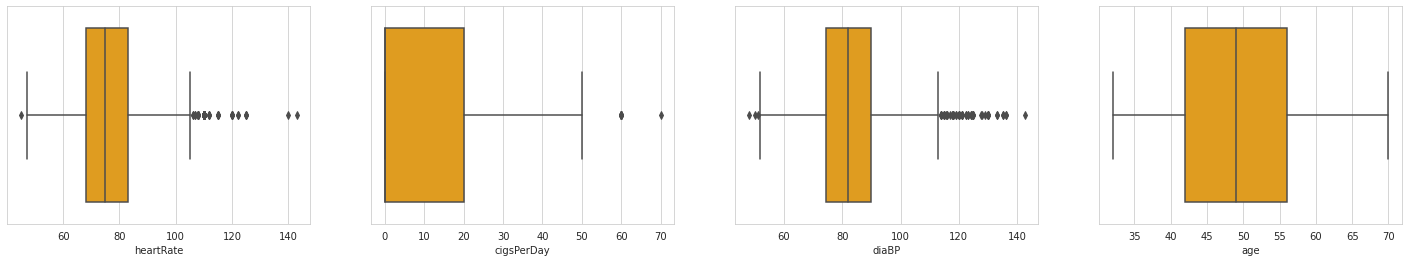

In [43]:
# plotting different column values to check outliers

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=data['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=data['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=data['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=data['age'],ax=ax4,color = 'orange')

###Treatment of outliers

In [44]:
# function to find outliers using Z score
outlier_list = []

def outlier_detection(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)    
    for data_point in data:
        z_score = (data_point -mean)/std
        if (np.abs(z_score) > thres):
            outlier_list.append(data_point)
    return outlier_list

In [45]:
cols = ['BMI','totChol','sysBP','glucose','heartRate','cigsPerDay','diaBP','age']
for col in cols:
  outlier_values = outlier_detection(data[col])
  print("number of Outliers for feature {}: ".format(col), len(outlier_values))

number of Outliers for feature BMI:  46
number of Outliers for feature totChol:  65
number of Outliers for feature sysBP:  104
number of Outliers for feature glucose:  148
number of Outliers for feature heartRate:  167
number of Outliers for feature cigsPerDay:  184
number of Outliers for feature diaBP:  220
number of Outliers for feature age:  220


In [46]:
# Computing 10th, 90th percentiles and replacing the outliers
def treat_outliers(data):
  fifth_qunatile = data.quantile(0.05) 
  ninetyfive_qunatile  = data.quantile(0.95) 
  data.clip(fifth_qunatile, ninetyfive_qunatile, inplace=True)

for col in cols:
  treat_outliers(data[col])

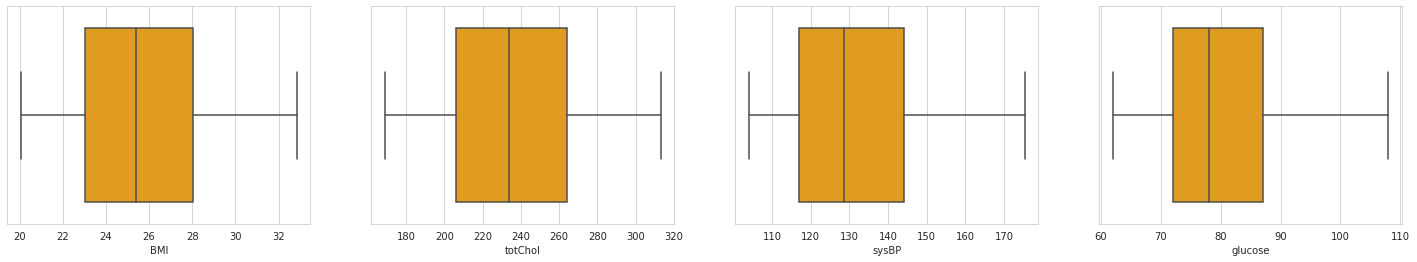

In [47]:
# plotting different column values to check outliers if they exist or not 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=data['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=data['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=data['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=data['glucose'],ax=ax4,color = 'orange')

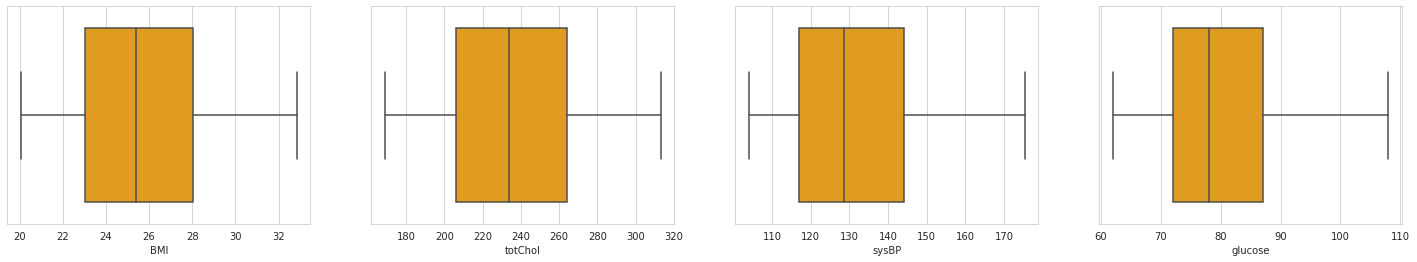

In [48]:
# plotting different column values to check outliers if they exist or not 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=data['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=data['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=data['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=data['glucose'],ax=ax4,color = 'orange')


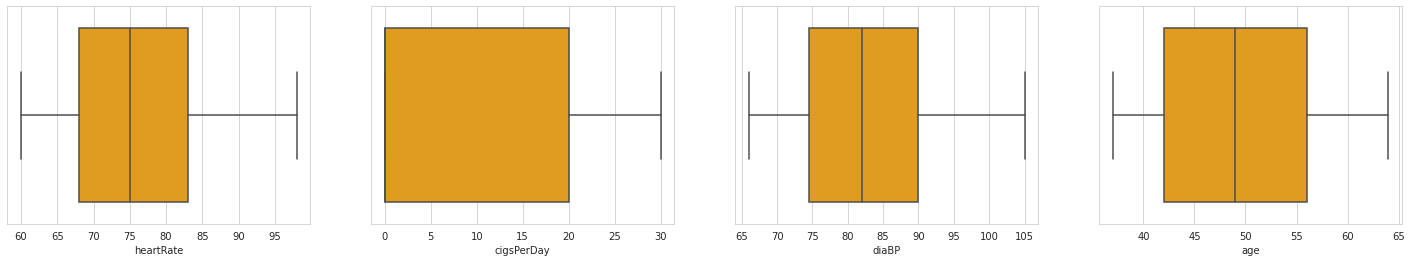

In [49]:
# plotting different column values to check outliers if they exist or not

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=data['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=data['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=data['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=data['age'],ax=ax4,color = 'orange')

###Insights using feature engineering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


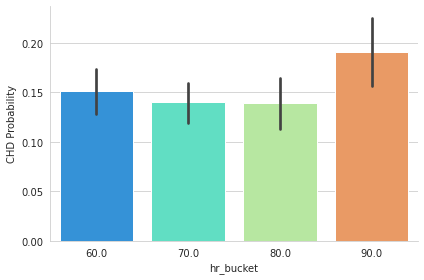

In [50]:
data['hr_bucket'] = data['heartRate'].apply(lambda x : 10*(x//10))
ax = sns.catplot('hr_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow' )
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


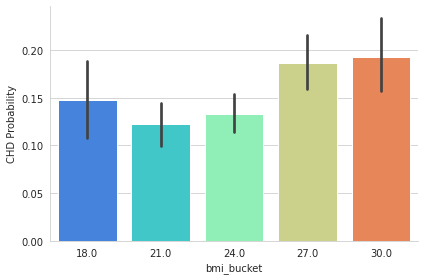

In [51]:
data['bmi_bucket'] = data['BMI'].apply(lambda x : 3*(x//3))
ax = sns.catplot('bmi_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


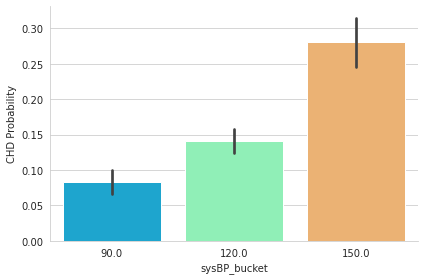

In [52]:
data['sysBP_bucket'] = data['sysBP'].apply(lambda x : 30*(x//30))
ax = sns.catplot('sysBP_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


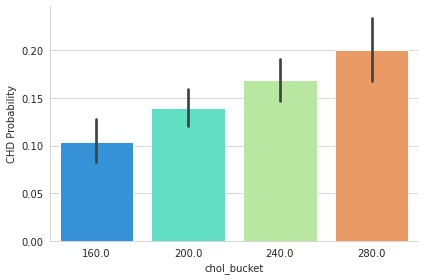

In [53]:
data['chol_bucket'] = data['totChol'].apply(lambda x : 40*(x//40))
ax = sns.catplot('chol_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


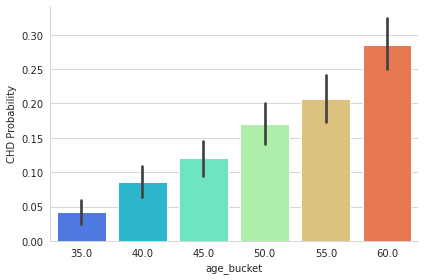

In [54]:
data['age_bucket'] = data['age'].apply(lambda x : 5*(x//5))
ax=sns.catplot('age_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


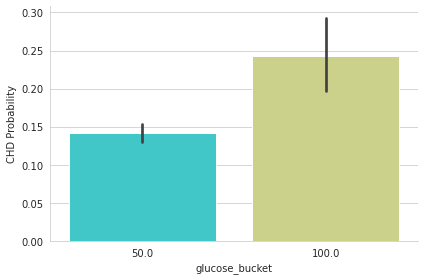

In [55]:
data['glucose_bucket'] = data['glucose'].apply(lambda x : 50*(x//50))
ax = sns.catplot('glucose_bucket', 'TenYearCHD', kind='bar', data = data, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

###Checking collinearity between variables

In [56]:
X = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
y = ['TenYearCHD']   

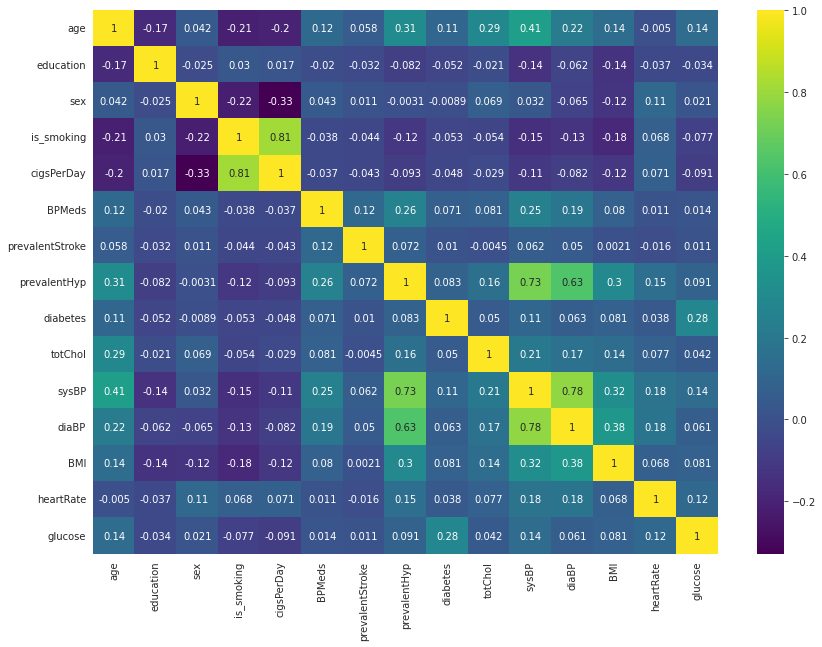

In [57]:
# checking correlation between variables

correlation_calc = data[X].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap='viridis')

In [58]:
# dropping columns to remove rows which are combined

data['pulsePressure'] =data['sysBP'] - data['diaBP']
data.drop(['diaBP'],axis=1,inplace=True)
data.drop(['sysBP'],axis=1,inplace=True)

In [59]:
# dropping is_smoking column as cigsPerDay is highly correlated to it

data.drop(['is_smoking'],axis=1,inplace=True)

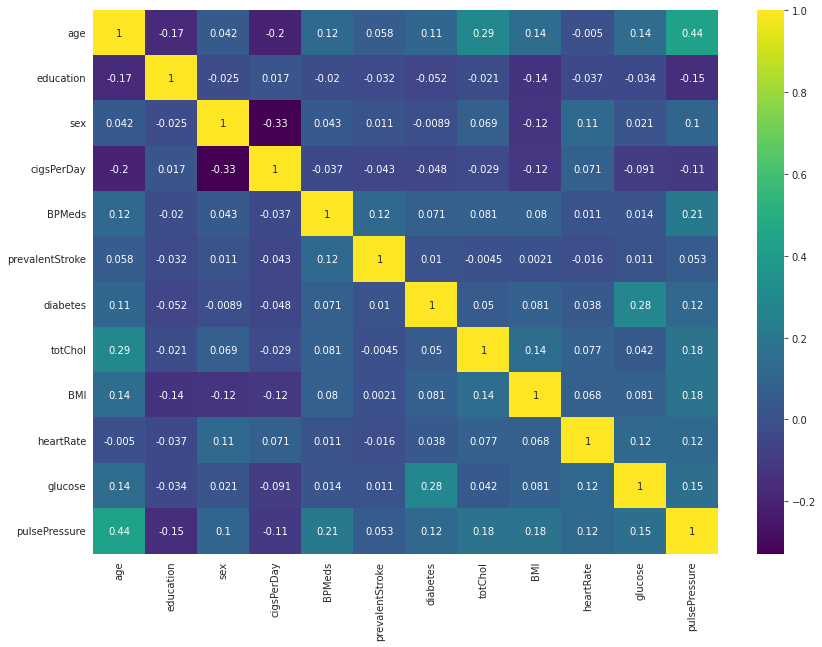

In [60]:
# checking correlation between variables
X = ['age','education', 'sex', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'diabetes', 'totChol',
        'BMI', 'heartRate', 'glucose','pulsePressure']

correlation_calc = data[X].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap='viridis')

In [61]:
data.drop(['prevalentHyp'],axis=1,inplace=True)

###Resampling of data as data is imbalanced

In [62]:
X = data[['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
        'diabetes', 'totChol', 'BMI', 'heartRate',
       'glucose',  'pulsePressure']]
y = data['TenYearCHD']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_train, y_train = tl.fit_resample(X_train, y_train)

In [65]:
X_train.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,pulsePressure
0,39.0,2.0,1.0,0.0,0.0,0.0,0.0,250.0,29.23,90.0,71.0,30.5
1,49.0,3.0,0.0,10.0,0.0,0.0,0.0,305.0,26.29,84.0,65.0,53.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,219.0,24.05,60.0,87.0,34.0
3,46.0,2.0,1.0,3.0,0.0,0.0,0.0,214.0,21.82,63.0,66.0,57.0
4,50.0,2.0,1.0,0.0,0.0,0.0,0.0,210.0,23.96,60.0,86.0,28.0


In [66]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

##**Models Implementation for fitting the training data**

###**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Predictions and Evaluations**

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       868
           1       0.19      0.74      0.30       149

    accuracy                           0.50      1017
   macro avg       0.55      0.60      0.46      1017
weighted avg       0.81      0.50      0.56      1017



In [72]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[396 472]
 [ 38 111]]


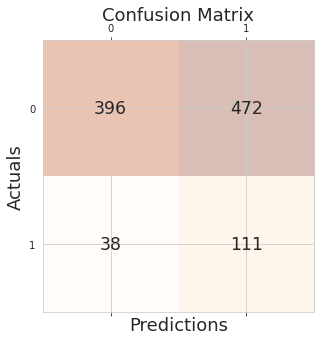

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [75]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.190
Recall: 0.745
Accuracy: 0.499


###**Conclusion**
1. Precision = 19%, means 19 percent of your predictions were correct.

2. Recall = 74.5%, means 74.5 percent of the positive cases model catch.

3. Accuracy = 49.9%, means model can predict sick people 49.9% of the time.

4. F1 score = 30 %, means 30 percent of positive predictions were correct.

###**Training a Decision Tree Model**

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier()

In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Predictions and Evaluation of Decision Tree**

In [79]:
predictions = dtree.predict(X_test)

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       868
           1       0.22      0.47      0.30       149

    accuracy                           0.67      1017
   macro avg       0.55      0.59      0.54      1017
weighted avg       0.79      0.67      0.71      1017



In [81]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[614 254]
 [ 79  70]]


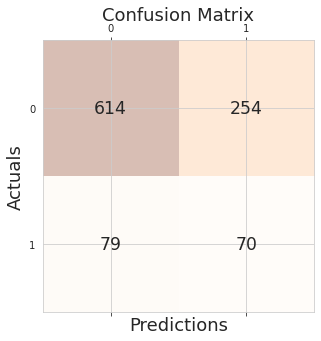

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [83]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.216
Recall: 0.470
Accuracy: 0.673


###**Conclusion**
1. Precision = 21.4%, means 21.4 percent of your predictions were correct.

2. Recall = 49 %, means 49 percent of the positive cases model catch.

3. Accuracy = 66.2%, means model can predict sick people 66.2% of the time.

4. F1 score = 30 %, means 30 percent of positive predictions were correct.

##**Training the Random Forest model**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators=600)

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

**Predictions and Evaluation**

In [87]:
predictions = rfc.predict(X_test)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       868
           1       0.25      0.49      0.33       149

    accuracy                           0.71      1017
   macro avg       0.57      0.62      0.58      1017
weighted avg       0.80      0.71      0.75      1017



In [89]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[653 215]
 [ 76  73]]


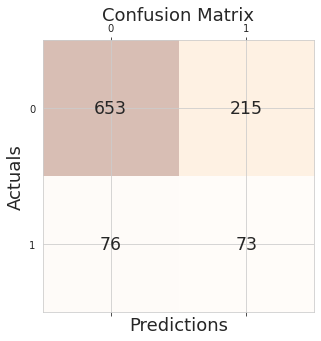

In [90]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [91]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.253
Recall: 0.490
Accuracy: 0.714


###**Conclusion**
1. Precision = 26.2%, means 26.2 percent of your predictions were correct.

2. Recall = 49 %, means 49 percent of the positive cases model catch.

3. Accuracy = 72.3%, means model can predict sick people 72.3% of the time.

4. F1 score = 34 %, means 34 percent of positive predictions were correct.

##**Support Vector Machine Classifier**

In [92]:
from sklearn.svm import SVC

In [93]:
svc_model = SVC()

In [94]:
svc_model.fit(X_train,y_train)

SVC()

**Model Evaluation**

In [95]:
predictions = svc_model.predict(X_test)

In [96]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[384 484]
 [ 27 122]]


In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60       868
           1       0.20      0.82      0.32       149

    accuracy                           0.50      1017
   macro avg       0.57      0.63      0.46      1017
weighted avg       0.83      0.50      0.56      1017



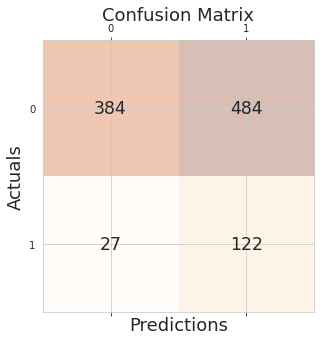

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [99]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.201
Recall: 0.819
Accuracy: 0.498


###**Conclusion**
1. Precision = 20.1%, means 20.1 percent of your predictions were correct.

2. Recall = 81.9 %, means 81.9 percent of the positive cases model catch.

3. Accuracy = 49.8%, means model can predict sick people 72.3% of the time.

4. F1 score = 32 %, means 32 percent of positive predictions were correct.

##**Gridsearch**

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [102]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.4s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [103]:
grid_predictions = grid.predict(X_test)

In [104]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[384 484]
 [ 27 122]]


In [105]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       868
           1       0.20      0.32      0.25       149

    accuracy                           0.72      1017
   macro avg       0.54      0.55      0.54      1017
weighted avg       0.77      0.72      0.74      1017



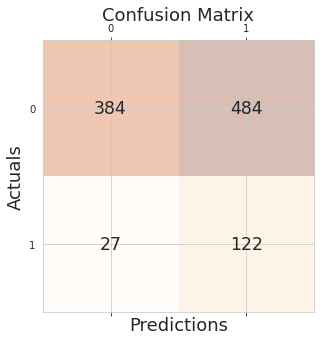

In [106]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [107]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.201
Recall: 0.819
Accuracy: 0.498


###**Conclusion**
1. Precision = 20.1%, means 20.1 percent of your predictions were correct.

2. Recall = 81.9 %, means 81.9 percent of the positive cases model catch.

3. Accuracy = 49.8%, means model can predict sick people 72.3% of the time.

4. F1 score = 25 %, means 25 percent of positive predictions were correct.

##**Conclusion**

Since our aim was to lower the false-negative value so that patients do
not get detected improperly and are demonstrated to be safe, I used the recall score as the evaluation matrix. The patient's health may suffer greatly as a result of this.


Data were resampled because they weren't balanced. High accuracy can be achieved with imbalanced data, however, in these situations, recall, precision, and F1 score must be considered.



Used a KNN-imputer to perform missing value imputation, and processed data to remove outliers. To solve the issue of class imbalance, SMOTE boosting was used to over-sample the minority class observations.



Newer elements like pulse pressure, age bucket, and BMI bucket that helped to explain the separation in the Risk were created using the information from EDA.


Due to the parametric relationship in the data, a logistic regression model was implemented, and it was successful in achieving a Recall of 74.5%. Even though the recall score for SVM was 81.9 %, SVM is not an interpretable model, thus I chose an interpretable model for this situation.


All measures, including Precision, Recall, Accuracy, and F1 score were evaluated for each model.



Based on this analysis,

Logistic regression can identify positive cases with a 74.5% Recall.

Using a decision tree, positive cases may be predicted with a recall of 49%.

With the help of Random Forest, positive cases may be predicted with a 49% Recall.

Using a Support Vector Machine, positive cases can be predicted with an 81.9% Recall.

Using Grid Search CV, positive cases can be predicted with 81.9% Recall.
